In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data

In [4]:
df = pd.read_csv('./data/medical_examination.csv')
print(df)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1

# Add 'overweight' column

In [5]:
df['overweight'] = np.where((df['weight'] / np.square(df['height']/ 100)) > 25, 1, 0)
print(df)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  overweight  
0          0     0       1

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [6]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

print(df[['cholesterol', 'gluc']])

       cholesterol  gluc
0                0     0
1                1     0
2                1     0
3                0     0
4                0     0
...            ...   ...
69995            0     0
69996            1     1
69997            1     0
69998            0     1
69999            1     0

[70000 rows x 2 columns]


# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [7]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
print(df_cat)


        cardio variable  value
0            0   active      1
1            1   active      1
2            1   active      0
3            1   active      1
4            0   active      0
...        ...      ...    ...
419995       0    smoke      1
419996       1    smoke      0
419997       1    smoke      0
419998       1    smoke      0
419999       0    smoke      0

[420000 rows x 3 columns]


# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [8]:
df_cat.rename(columns={'variable': 'features', 'value': 'counts'}, inplace=True )
print(df_cat)

        cardio features  counts
0            0   active       1
1            1   active       1
2            1   active       0
3            1   active       1
4            0   active       0
...        ...      ...     ...
419995       0    smoke       1
419996       1    smoke       0
419997       1    smoke       0
419998       1    smoke       0
419999       0    smoke       0

[420000 rows x 3 columns]


# Draw the catplot with 'sns.catplot()'

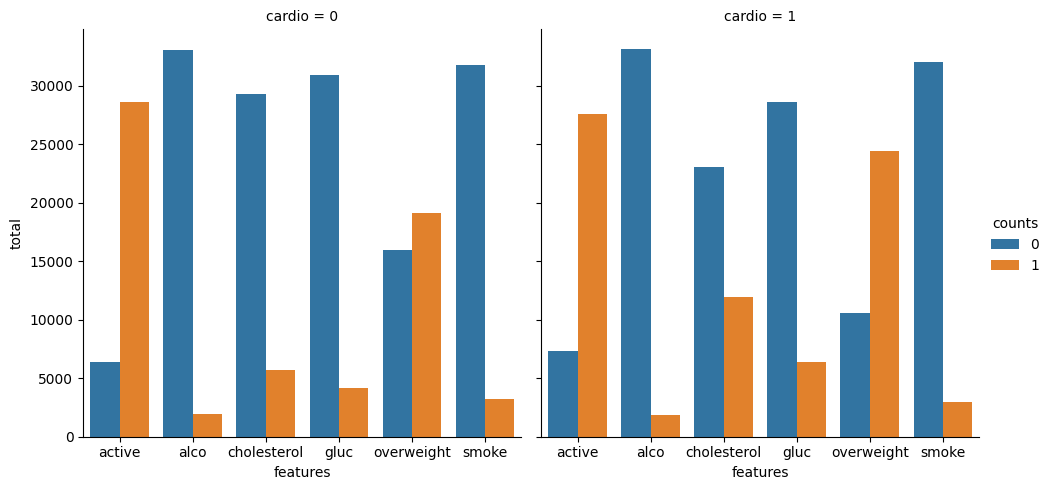

In [9]:
fig = sns.catplot(x="features",kind="count", hue="counts", data=df_cat, col="cardio" )
fig.set_axis_labels('features', 'total')

# Draw Heat Map

# Clean the data
Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

In [10]:
df_heat = df[(
    (df['ap_lo'] <= df['ap_hi'])&
    (df['height'] >= df['height'].quantile(0.025))&
    (df['height'] <= df['height'].quantile(0.975))&
    (df['weight'] >= df['weight'].quantile(0.025))&
    (df['weight'] <= df['weight'].quantile(0.975))
)]
print(df_heat)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69993  99991  19699    1     172    70.0    130     90            0     0   
69994  99992  21074    1     165    80.0    150     80            0     0   
69995  99993  19240    2     168    76.0    120     80            0     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1

# Calculate the correlation matrix

In [11]:

corr = df_heat.corr()
print(corr)

                   id       age       sex    height    weight     ap_hi  \
id           1.000000  0.002507  0.003426  0.000326  0.000149  0.003492   
age          0.002507  1.000000 -0.018132 -0.076932  0.070168  0.018689   
sex          0.003426 -0.018132  1.000000  0.505785  0.129979  0.005063   
height       0.000326 -0.076932  0.505785  1.000000  0.251503  0.004586   
weight       0.000149  0.070168  0.129979  0.251503  1.000000  0.027030   
ap_hi        0.003492  0.018689  0.005063  0.004586  0.027030  1.000000   
ap_lo        0.000484  0.153508  0.059947  0.017922  0.227922  0.072803   
cholesterol  0.003719  0.129996 -0.037605 -0.063522  0.135981  0.022807   
gluc         0.002289  0.086990 -0.021357 -0.030469  0.107072  0.011111   
smoke       -0.002732 -0.044371  0.337436  0.187830  0.056533 -0.001928   
alco        -0.000708 -0.026970  0.168637  0.089785  0.059917  0.000769   
active       0.005891 -0.011445  0.007864 -0.005661 -0.014430 -0.000222   
cardio       0.003900  0.

# Generate a mask for the upper triangle

In [12]:
mask = np.triu(np.ones_like(corr,dtype=bool))
print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False False False  True  True  True  True  True  True  True  True  True
   True  True]
 [False False False False  True  True  True  True  True  True  True  True
   True  True]
 [False False False False False  True  True  True  True  True  True  True
   True  True]
 [False False False False False False  True  True  True  True  True  True
   True  True]
 [False False False False False False False  True  True  True  True  True
   True  True]
 [False False False False False False False False  True  True  True  True
   True  True]
 [False False False False False False False False False  True  True  True
   True  True]
 [False False False False False False False False False False  True  True
   True  True]
 [False False False F

# Set up the matplotlib figure

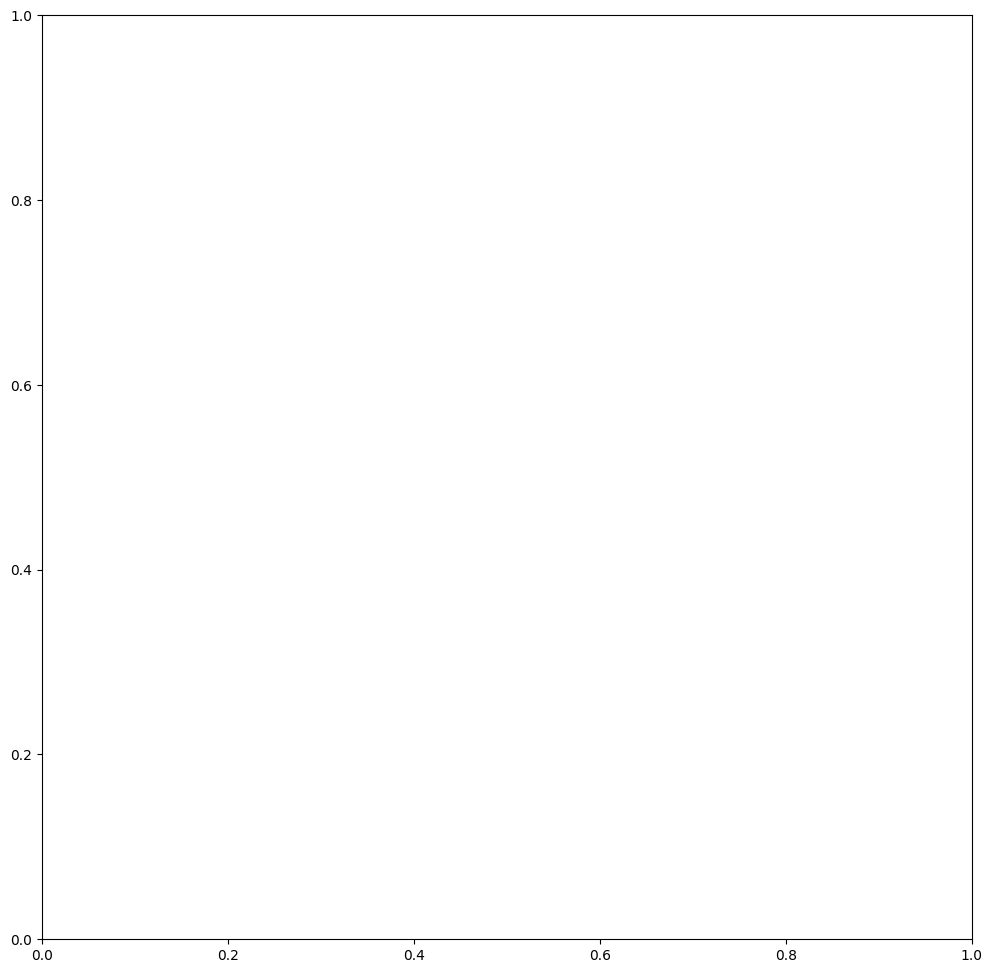

In [13]:
fig, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap with 'sns.heatmap()

<Axes: >

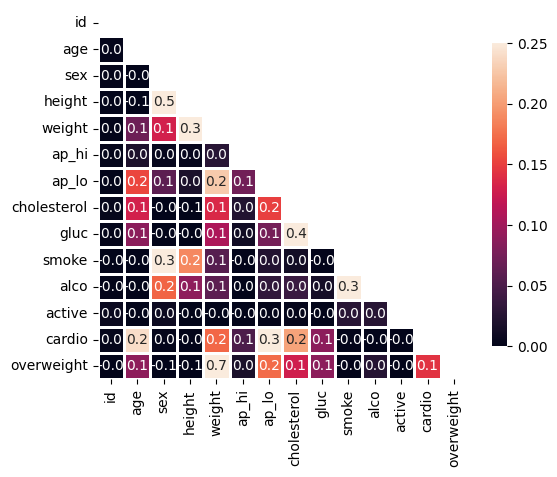

In [14]:
sns.heatmap(corr, vmin=0, vmax=0.25,fmt='.1f', linewidths=1, annot=True, square= True, mask = mask, cbar_kws={'shrink': .82} )